In [2]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import math

In [3]:
def load(path):
    result = []
    f = open(path)
    for line in f.readlines():
        result.append(eval(line))
    return result

node_edges = load("sample2_edges")
community = load("sample2_community")
edge_features = load("sample2_edge_features")
feature_matrix, adj_matrix, edge_attr, label_matrix, community_partition_index = np.load('sample2_dataset_norm.npy',allow_pickle=True)

# generate edge weight
edge_mask = np.load('edge_mask.npy').tolist()
for index,edge in enumerate(edge_mask):
    edge_mask[index] = np.mean(np.array((list(map(abs,edge)))))
    adj_matrix[index].sort()
    adj_matrix[index].append(edge_mask[index])
adj_matrix = pd.DataFrame(adj_matrix,columns=['node1','node2','edge'])
adj_matrix_df = adj_matrix.groupby(['node1','node2']).agg(list).reset_index()
adj_matrix_df['edge'] = adj_matrix_df['edge'].apply(lambda x:np.mean(np.array(x)))
adj = adj_matrix_df.values[:,[0,1,2]].tolist()
adj = [[int(i[0]),int(i[1]),i[2]] for i in adj]

In [26]:
print(label_matrix[997],label_matrix[1356])

1452 1526


In [4]:
def graph_pooling(edge,nodes):
    result = []
    for i in edge:
        if i[0] in nodes and i[1] in nodes:
            result.append(i)
    return result

In [ ]:
label_matrix_

In [553]:
print(label_matrix[1272],label_matrix[1139])

1624 159


In [5]:
node_link = list(np.load('agent_link_in_out_node.npy'))
a = [[i[0],i[1],i[2],i[3],label_matrix[i[0]]] for i in node_link if i[1]>2*i[3] and label_matrix[i[0]]>1500]
for i in node_link:
    if i[0]==1139:
        print(i)

[1139   45  621   46]


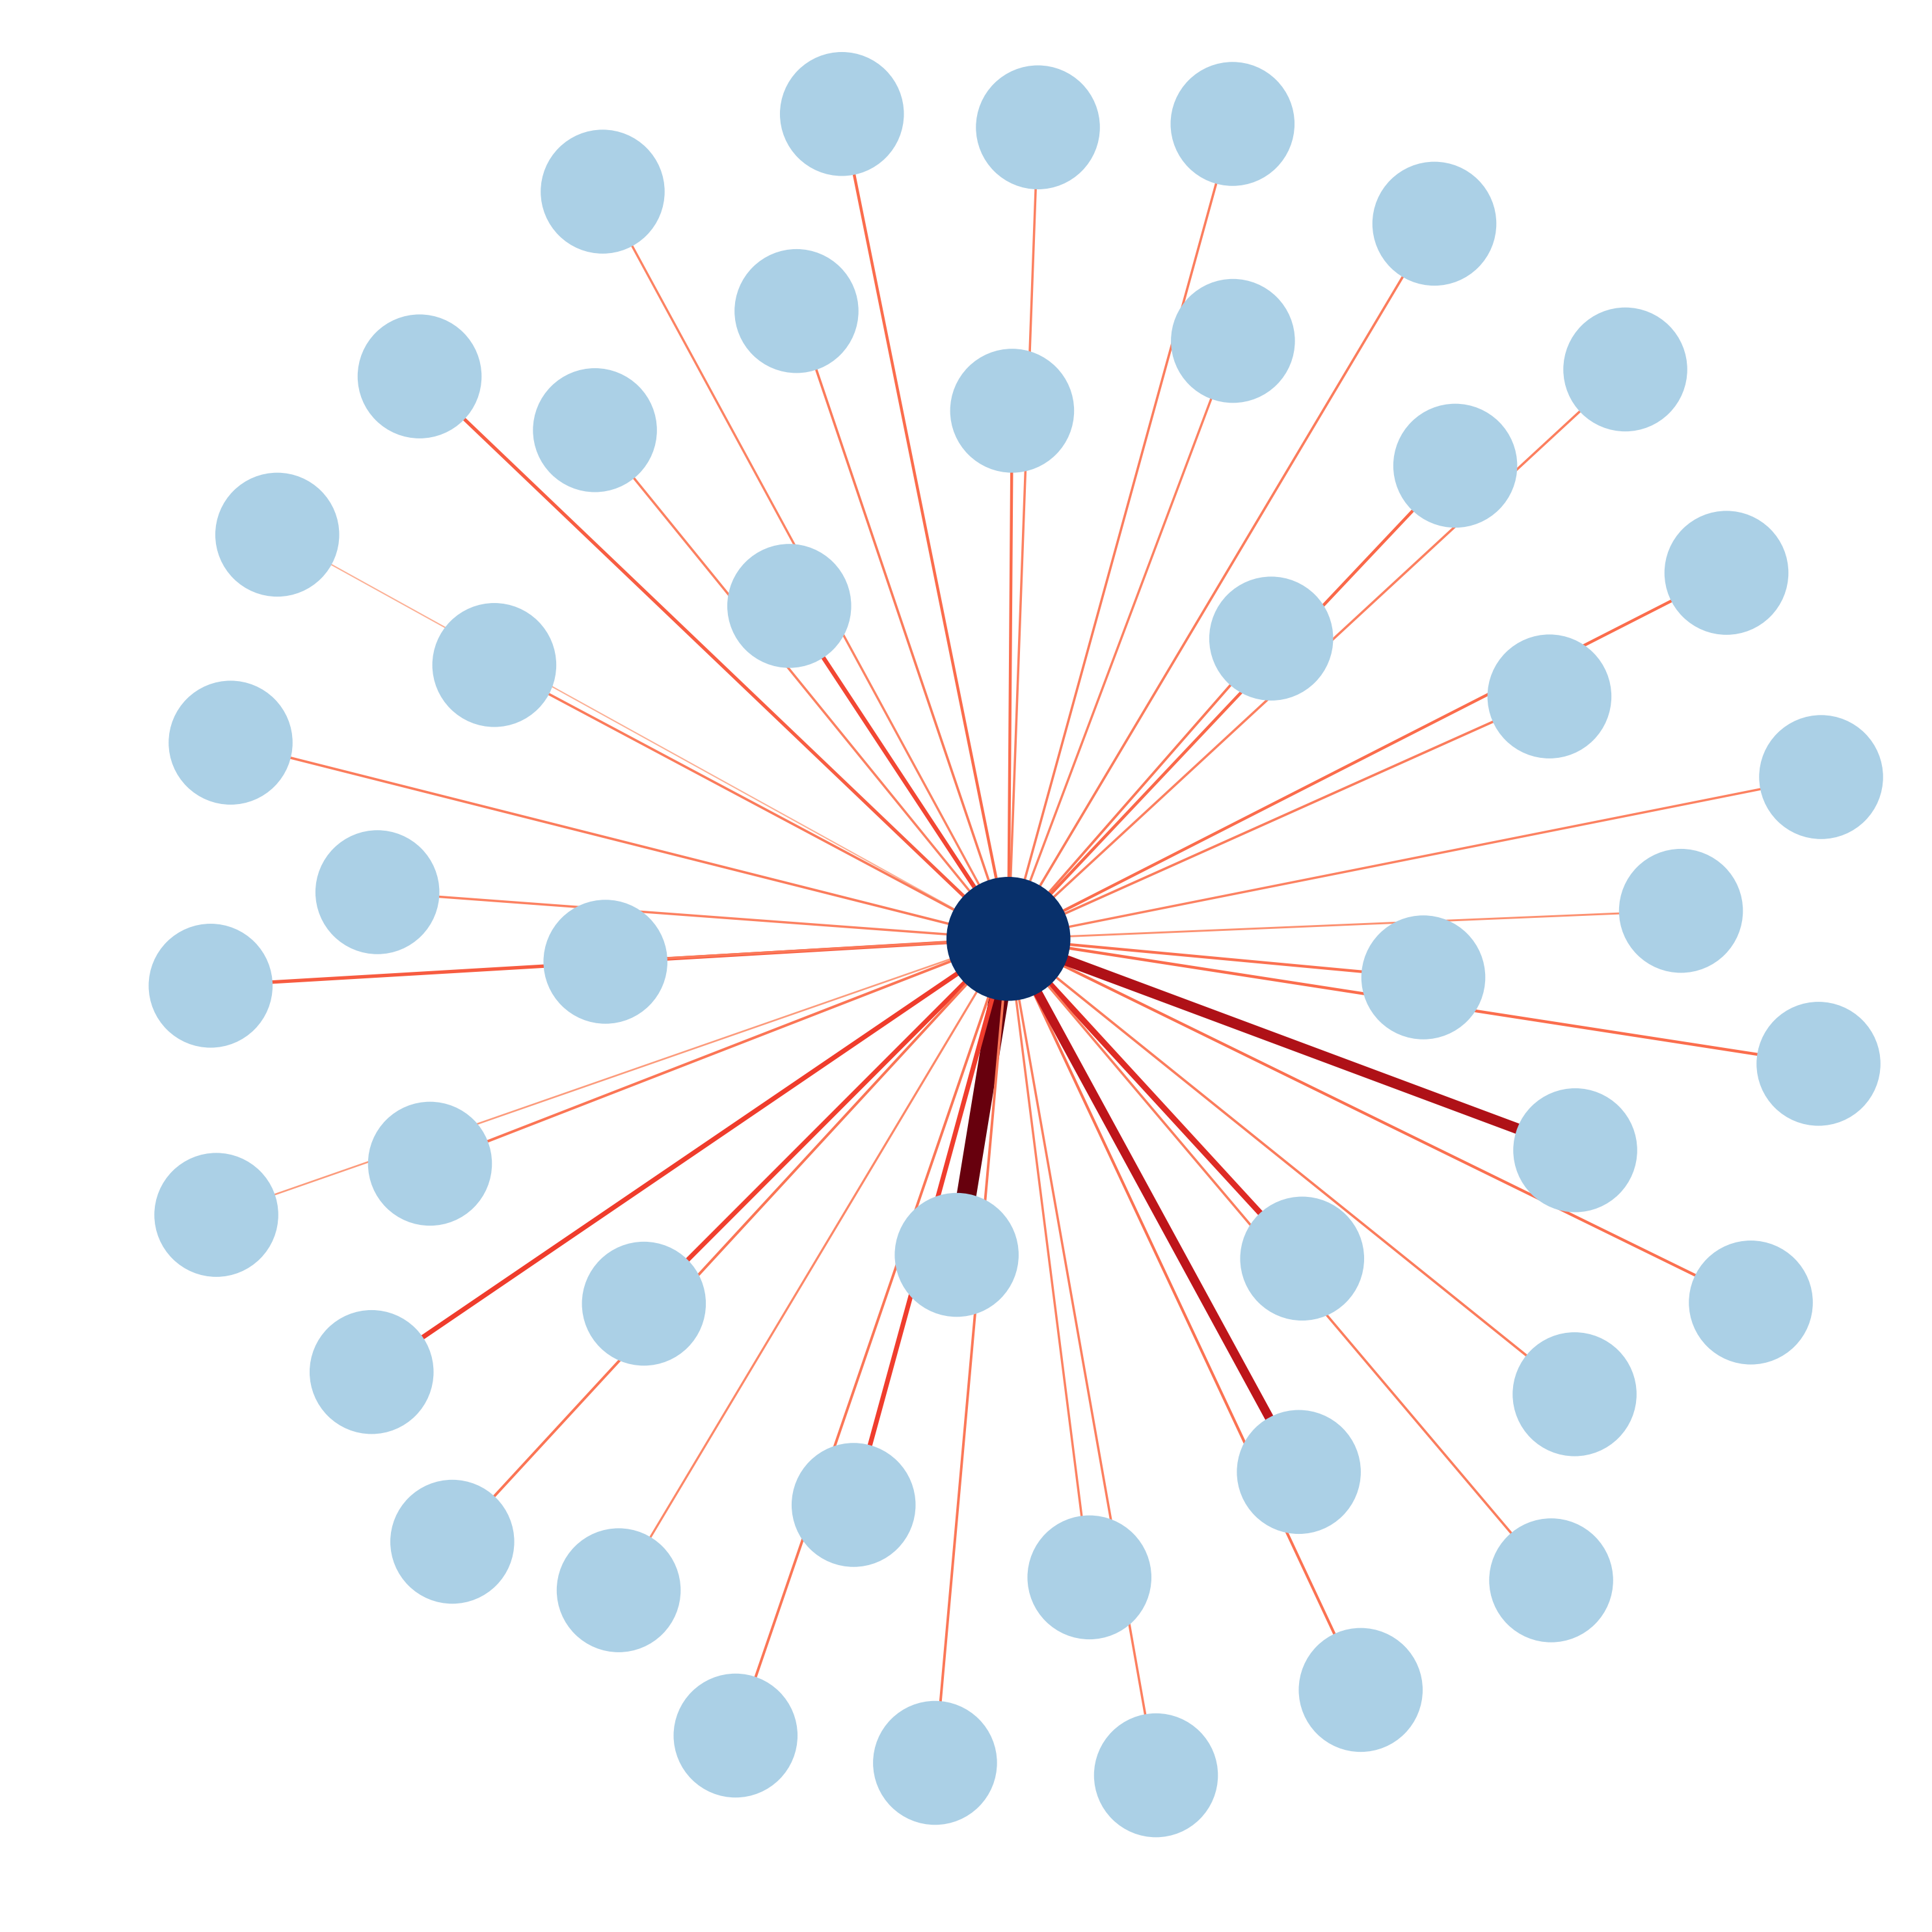

In [16]:
def within(x,agent):
    for a in agent:
        if int(x[0])==a:
            for j in agent:
                if j!=a:
                    if int(x[1]) in community_partition_index[j]:
                        return True
        elif int(x[1])==a:
            for j in agent:
                if j!=a:
                    if int(x[0]) in community_partition_index[j]:
                        return True
    return False

Draw_Dict_single_g = {
    'alpha':1,
    'vmin':0,
    'vmax':3,
    'cmap':plt.cm.Greens,
    'edge_cmap':plt.cm.Greys,
    'edge_vmin':-1,
    'edge_vmax':4
}

Draw_Dict_single_b = {
    'alpha':1,
    'vmin':-0.1,
    'vmax':3,
    'cmap':plt.cm.Blues,
    'edge_cmap':plt.cm.Reds,
    'edge_vmin':0.5,
    'edge_vmax':5
}


def wid(x):
    x = (x-0.2)*100
    if x>8:
        x = x-4
    return x

#10 14 18 20 80 

def wid_degree(x):
    if x>40:
        return 6
    return x
        
def size_degree(x):
    if x>40:
        return 5
    return x
        

def draw(x,agent,Draw_Dict,path):
    nodes_pool=[]
    for a in agent:
        nodes_pool += x[a]
    result = graph_pooling(adj,nodes_pool)
    G = nx.Graph()
    greater = []
    for i in result:
        flag=0
        for a in agent:
            if i[0] in community_partition_index[a] and i[1] not in community_partition_index[a] and i[0]!=a and i[1]!=a:
                greater.append([i[0],i[1]])
                flag=1
                break
        G.add_edge(i[0], i[1],weight=i[2])
        
    
    node_color = [wid_degree(G.degree(v)) for v in G]
    
    node_size = [size_degree(G.degree(v))*1000 for v in G]
    
    edge_width = [pow(2,wid(G[u][v]['weight']))/3 for u,v in G.edges()]
        
    edge_color = [wid(G[u][v]['weight']) for u,v in G.edges()]
        
    
    plt.figure(figsize=(10,10),dpi=300)
    pos = nx.drawing.layout.spring_layout(G)
    #,edge_vmin=Draw_Dict['edge_vmin'],edge_vmax=Draw_Dict['edge_vmax']
    nx.draw_networkx(G,pos = pos,edge_color = edge_color,node_size = 2000, node_color=node_color, alpha=Draw_Dict['alpha'], 
                     with_labels=False, font_size=10,width=edge_width, cmap=Draw_Dict['cmap'],vmin=-1,vmax=5,
                     edge_cmap = Draw_Dict['edge_cmap'],edge_vmin=-1)
    #nx.draw_networkx_edges(G, pos, edgelist=greater, edge_color='r', alpha=0.3, width=2,style='dashed')
    #nx.draw_networkx_labels(G,pos = pos,labels={a:'A' for index,a in enumerate(agent)}, font_size=40, font_color='w')
    #nx.draw_networkx_labels(G,pos = pos,labels={a:'A' for index,a in enumerate(agent)}, font_size=15, font_color='w')
    
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(path,bbox_inches='tight')

    return edge_color

path1 = '/Users/yuanyuan/Desktop/figure/cen.eps'
a = draw(community_partition_index,[1139],Draw_Dict_single_b,path1)
#997 1536

In [113]:
G = nx.random_geometric_graph(200, 0.125)
p = dict(nx.single_source_shortest_path_length(G, 0))

In [483]:
a.sort()
a

[0.5317712747953479,
 0.9020953379782537,
 1.072609391441376,
 1.2300380529762955,
 1.2994467855203362,
 1.32348693837816,
 1.3308544208088358,
 1.3325760521696817,
 1.333987691447322,
 1.3490599395993674,
 1.3498174533709189,
 1.3673486284979386,
 1.3684459062979326,
 1.3833899670810474,
 1.3864986885504471,
 1.4152344846950382,
 1.4185824758456866,
 1.419210595715048,
 1.4192206896536441,
 1.4253391652842202,
 1.4295528246762335,
 1.4718024666325769,
 1.4774648062087226,
 1.5029709368319044,
 1.52706971589055,
 1.535584885866187,
 1.5402938481615558,
 1.5835136980601183,
 1.6010798194169173,
 1.6219331808678517,
 1.6675589665789192,
 1.6783170325245234,
 1.6790843840700398,
 1.6833697717085871,
 1.7470988799987959,
 1.906980400292782,
 1.935091983186027,
 2.237848241307125,
 2.3562217804930508,
 2.364606477649245,
 2.3983861253946777,
 2.7107604467414284,
 3.307971401815263,
 3.5701967859039896,
 8.439791683053393]

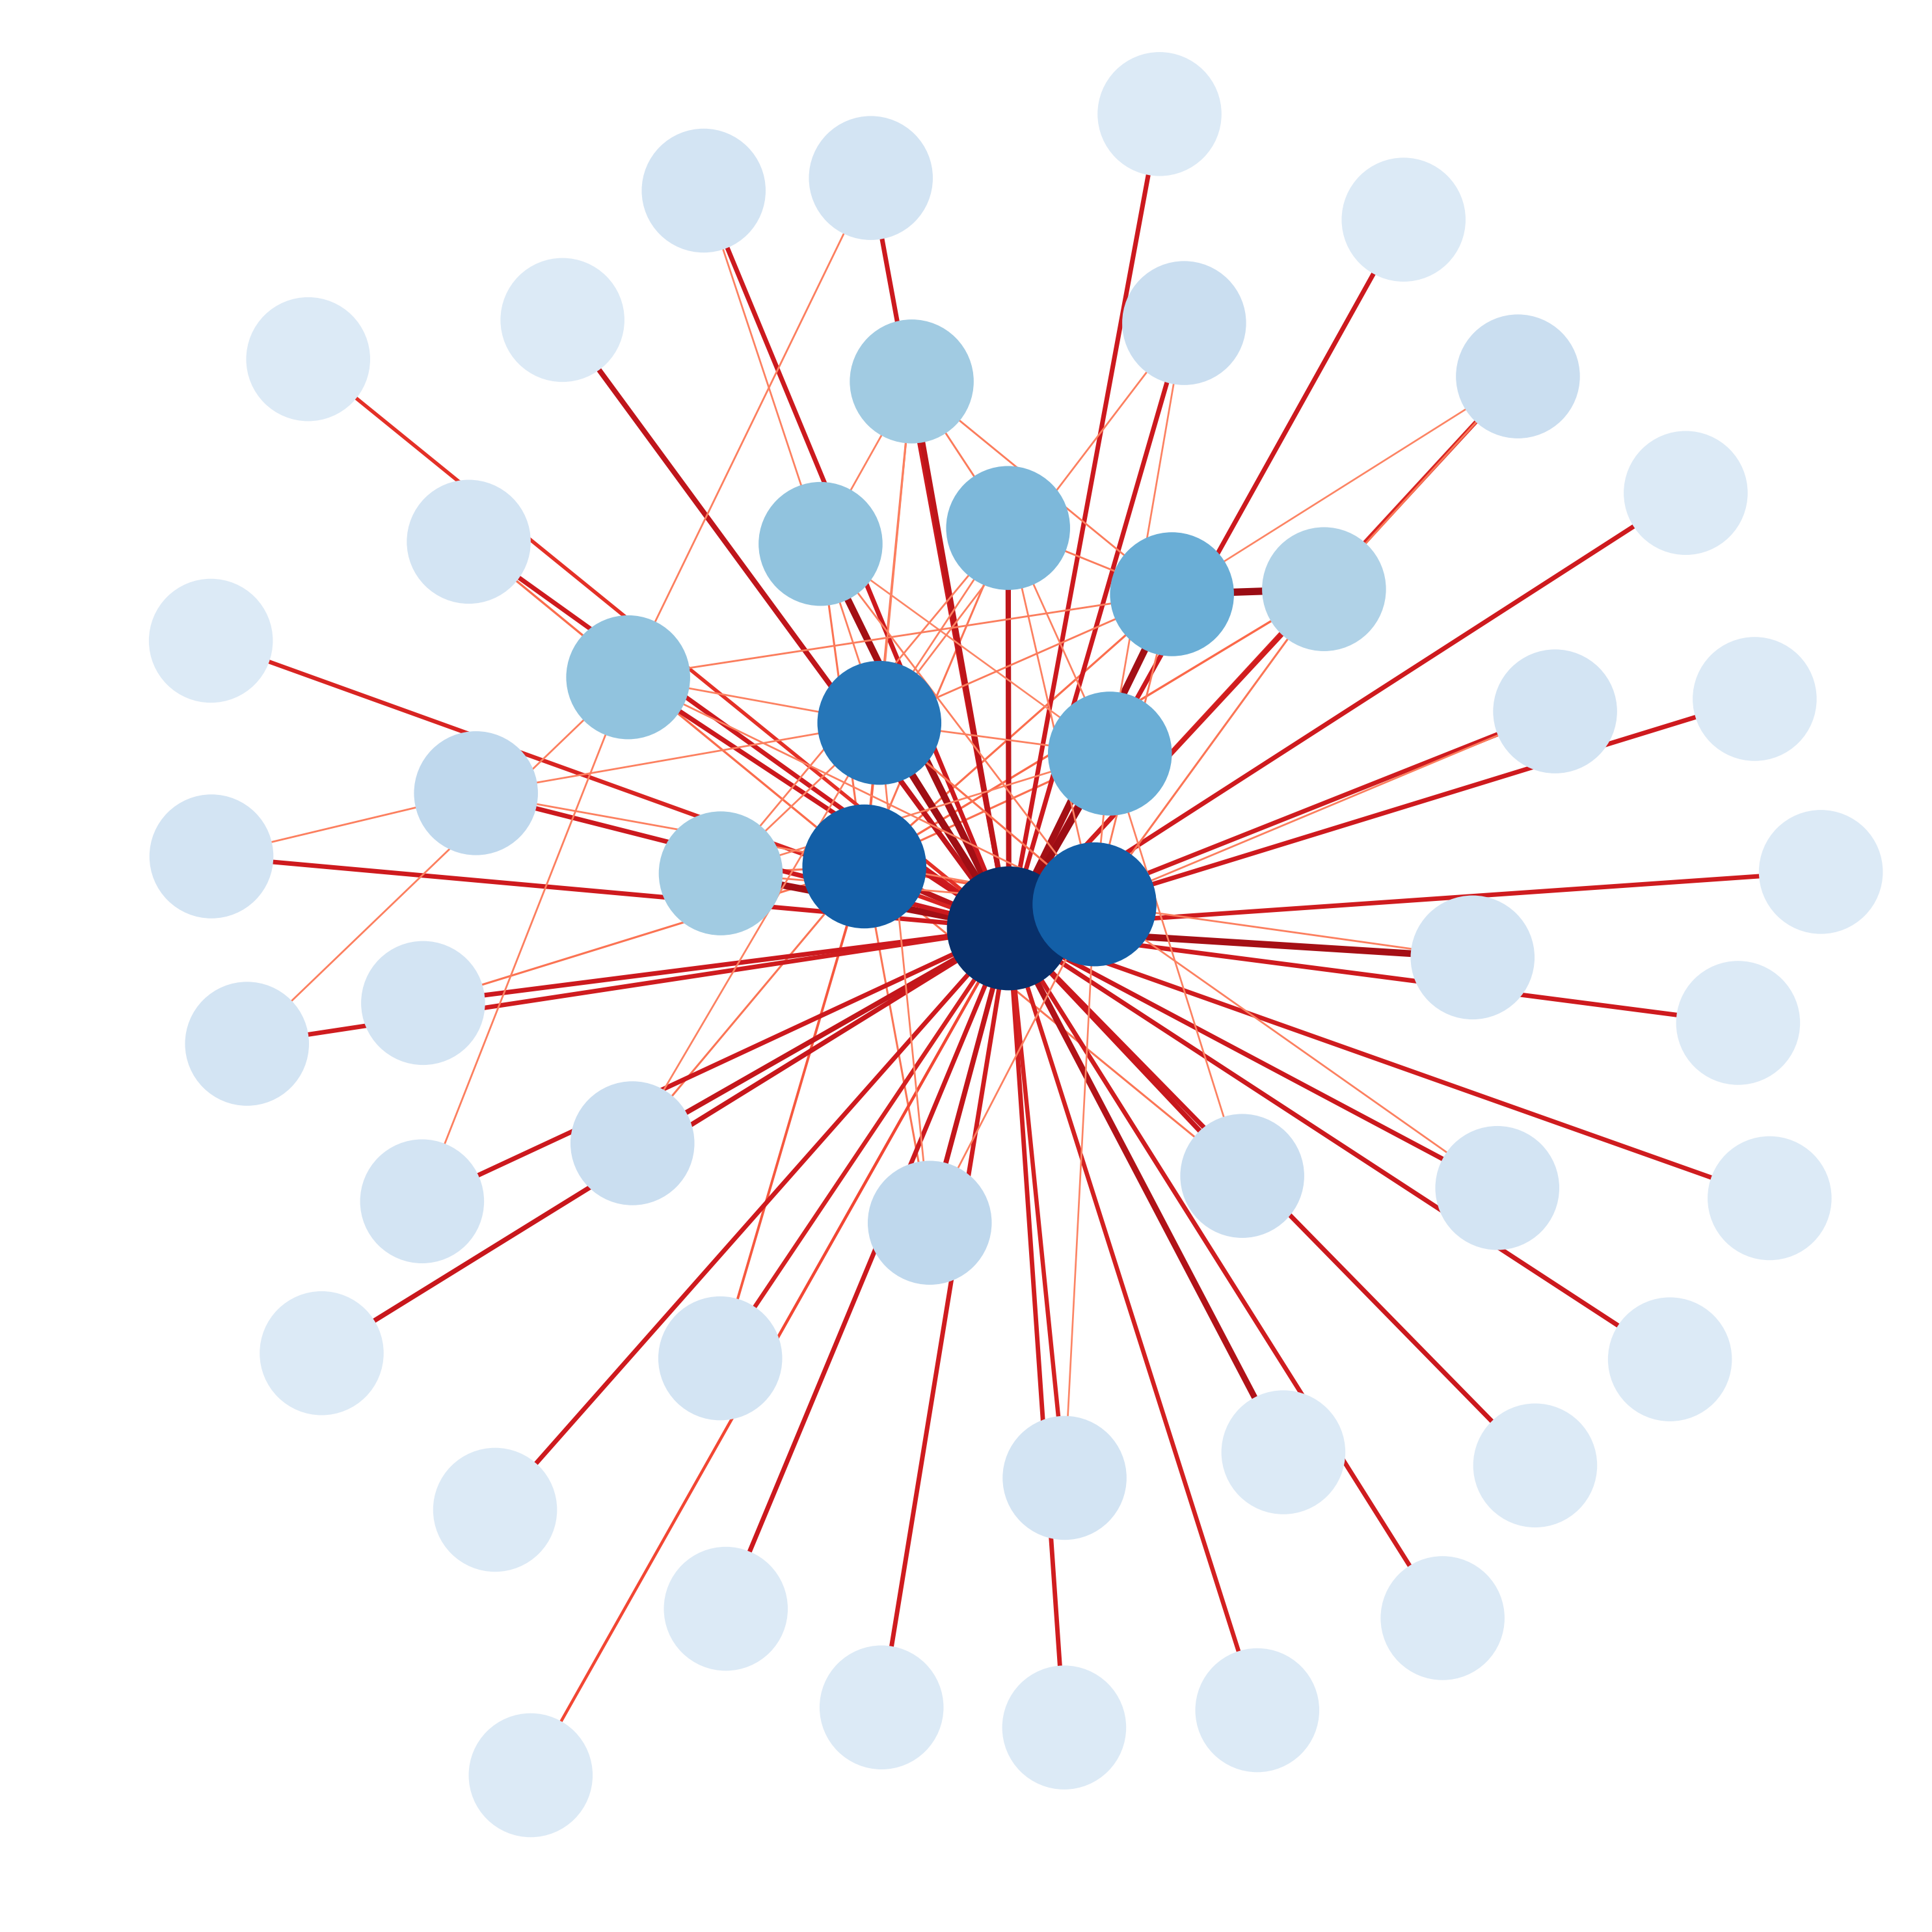

In [25]:
def within(x,agent):
    for a in agent:
        if int(x[0])==a:
            for j in agent:
                if j!=a:
                    if int(x[1]) in community_partition_index[j]:
                        return True
        elif int(x[1])==a:
            for j in agent:
                if j!=a:
                    if int(x[0]) in community_partition_index[j]:
                        return True
    return False

def wid(x):
    if x>0.7 and x<10:
        x = 0.7+(x-0.7)/50
    elif x>10:
        x = 0.7+(x-0.7)/60
    return x*10

#10 14 18 20 80 

def size_degree(x):
    if x>50:
        x = x-40
    return x
        
def wid_degree(x):
    if x>50:
        x = x-30
    return x


Draw_Dict_inner_b = {
    'alpha':1,
    'vmin':-0.1,
    'vmax':3,
    'cmap':plt.cm.Blues,
    'edge_cmap':plt.cm.Reds,
    'edge_vmin':0.5,
    'edge_vmax':5
}


def draw(x,agent,Draw_Dict,path):
    nodes_pool=[]
    for a in agent:
        nodes_pool += x[a]
    result = graph_pooling(adj,nodes_pool)
    G = nx.Graph()
    greater = []
    for i in result:
        flag=0
        for a in agent:
            if i[0] in community_partition_index[a] and i[1] not in community_partition_index[a] and i[0]!=a and i[1]!=a:
                greater.append([i[0],i[1]])
                flag=1
                break
        G.add_edge(i[0], i[1],weight=i[2])
        
    node_color = [wid_degree(G.degree(v)) for v in G]
    
    node_degree = [G.degree(v) for v in G]

    node_size = [size_degree(G.degree(v))*400 for v in G]
    
    edge_width = [pow(1.3,wid(G[u][v]['weight']))/2.5 for u,v in G.edges()]
        
    edge_color = [wid(G[u][v]['weight']) for u,v in G.edges()]
    
    edge = [G[u][v]['weight'] for u,v in G.edges]

    plt.figure(figsize=(10,10),dpi=300)
    pos = nx.drawing.layout.spring_layout(G)

    
    nx.draw_networkx(G,pos = pos,edge_color = edge_color,node_size = 2000, node_color=node_color, alpha=Draw_Dict['alpha'], 
                     with_labels=False, font_size=10,width=edge_width, cmap=Draw_Dict['cmap'],vmin=-2,vmax=20,
                     edge_cmap = Draw_Dict['edge_cmap'],edge_vmin=-3)
    
    #nx.draw_networkx_labels(G,pos = pos,labels={a:'A' for index,a in enumerate(agent)}, font_size=40, font_color='w')
   
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(path,bbox_inches='tight')

    return edge_color

path2 = '/Users/yuanyuan/Desktop/figure/inner.eps'
G = draw(community_partition_index,[1356],Draw_Dict_inner_b,path2)
# 1356 1251


In [522]:
G.sort()
G

[1.7603161751562932,
 1.7721332536116892,
 1.7971279357230947,
 1.8068521121021097,
 1.8458833631933507,
 1.9046514303133222,
 1.9286777828254322,
 1.954591416313209,
 1.978009659783537,
 1.978009659783537,
 1.9798206599899366,
 1.9881689005616314,
 1.9910280062778385,
 1.991716981147105,
 1.9954300239170872,
 1.9965000443063943,
 1.9981350645777458,
 1.998497765225851,
 2.00334775055145,
 2.003705143970556,
 2.0044096153016717,
 2.007133956531319,
 2.0077599621529143,
 2.008944824929348,
 2.009439029343637,
 2.012330122588772,
 2.0179659098269336,
 2.019950791282363,
 2.0223215369972545,
 2.0276168112744433,
 2.0298820956216694,
 2.031176904081267,
 2.0321300610252084,
 2.0337586518511435,
 2.0359849794934695,
 2.0445593702610836,
 2.048828864108538,
 2.0515009982867816,
 2.0519319405774756,
 2.0556199558090276,
 2.057679234258573,
 2.0598253079883366,
 2.062648311139622,
 2.0668822550128167,
 2.0708134854345044,
 2.071506664013584,
 2.0814214861007843,
 2.085376961941288,
 2.08577919

<IPython.core.display.Javascript object>


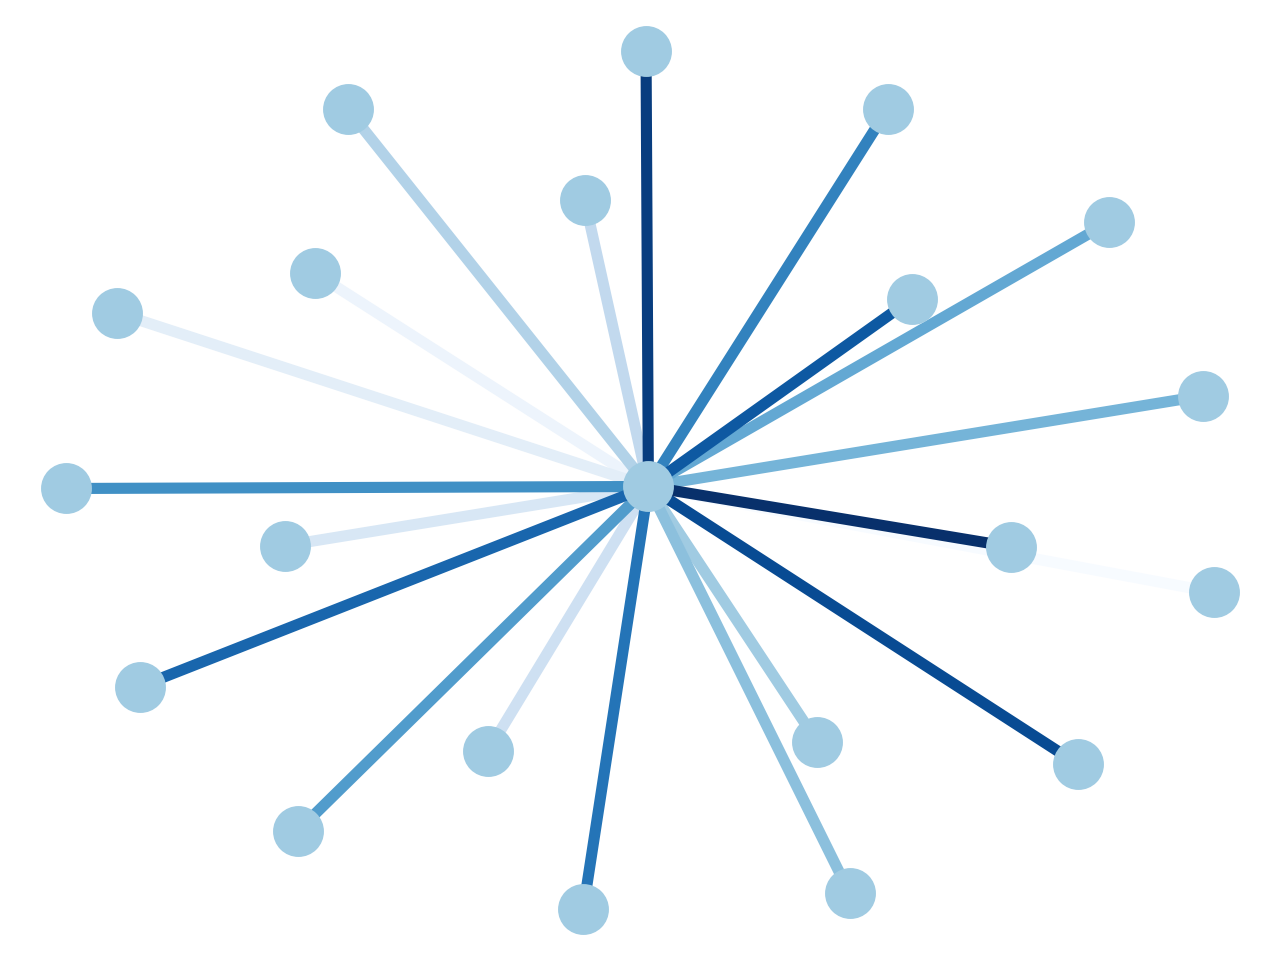

In [166]:
plt.figure()
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
nx.draw(G, pos, **options)
plt.show()

In [154]:
b

[5.123609418823132,
 2.3617169619156,
 2.4118188599820116,
 2.3971262018951744,
 2.3500430791516354,
 2.3453129945728843,
 2.3730209386919046,
 2.3523622399453457,
 2.559303709507683,
 2.6838341940648904,
 3.038772190944028,
 2.3705081173021063,
 2.739762424481497,
 2.890364102198494,
 2.5112255263230043,
 3.298585362604674,
 5.114884685849928,
 5.110409721775556,
 5.1017810781119035,
 5.109273176907231,
 5.109447407377708,
 5.1109204163637,
 5.171017791735608,
 5.1211668083313855,
 5.108537860963147,
 5.1104263214139225,
 5.111622622279786,
 5.11040533184472,
 5.101410222700915,
 5.107821442328081,
 5.121515195267937,
 3.8278862779508005,
 5.108553471766677,
 5.185962540745688,
 5.110417526417348,
 5.113948131970555,
 5.109033576876683,
 5.110747275377654,
 5.109299361184752,
 5.117504508083423,
 5.20168470341377,
 5.110473167779071,
 5.145315662057104,
 5.11119595665991,
 5.11058292130905,
 5.109409879565215,
 5.108532496895273,
 5.110407770510152,
 5.111286206839075,
 6.600643316034